In [2]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/25
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9075 - accuracy: 0.2917 - val_loss: 1.6112 - val_accuracy: 0.3962 - lr: 0.0100
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4569 - accuracy: 0.4660 - val_loss: 1.3226 - val_accuracy: 0.5195 - lr: 0.0100
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2392 - accuracy: 0.5546 - val_loss: 1.1780 - val_accuracy: 0.5751 - lr: 0.0100
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0854 - accuracy: 0.6122 - val_loss: 0.9783 - val_accuracy: 0.6479 - lr: 0.0100
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9667 - accuracy: 0.6578 - val_loss: 0.8920 - val_accuracy: 0.6857 - lr: 0.0100
Epoch 6/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8789 - accuracy: 0.6897 - val_loss: 0.8415 - val_accuracy: 0.7048 - lr: 0.0100
Epoch 7/25
1563/1563 [==============================

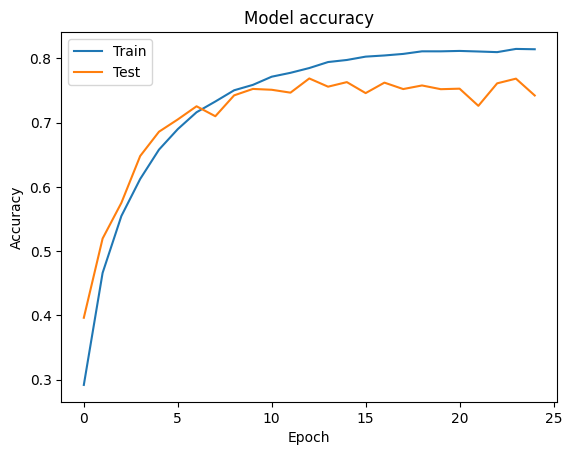

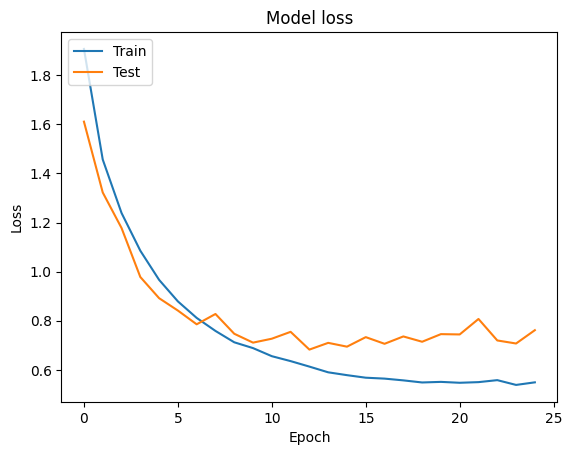

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# Learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.01
    decay = initial_lr / epochs
    lrate = initial_lr * (1 / (1 + decay * epoch))
    return lrate

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the modified model
model = Sequential()

# Add layers according to the new architecture
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
epochs = 25
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Create LearningRateScheduler callback
callbacks = [LearningRateScheduler(lr_schedule)]

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks=callbacks)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))
# Predict the first 4 images in the test set
predictions = model.predict(X_test[:4])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

# Compare predicted and actual labels
print("Predicted labels: ", predicted_labels)
print("Actual labels: ", actual_labels)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()